# Data Preparation


### Importing packages


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import torch

### Loading data


In [69]:
data = pd.read_csv("consumption_and_temperatures.csv")
data.head()

,timestamp,NO1_consumption,NO1_temperature,NO2_consumption,NO2_temperature,NO3_consumption,NO3_temperature,NO4_consumption,NO4_temperature,NO5_consumption,NO5_temperature
0,2017-05-01 00:00:00+00:00,3325.431995,2.1,3534.588,5.0,2674.838,5.5,2061.209,0.2,1609.089,3.9
1,2017-05-01 01:00:00+00:00,3344.690998,1.8,3560.209,4.1,2678.188,4.0,2045.436,0.1,1623.485,3.2
2,2017-05-01 02:00:00+00:00,3398.359002,3.2,3596.149,3.1,2678.341,3.7,2020.007,0.1,1634.128,2.7
3,2017-05-01 03:00:00+00:00,3430.220001,3.6,3594.042,2.3,2684.172,3.2,2021.920,0.1,1647.906,2.3
4,2017-05-01 04:00:00+00:00,3606.750000,3.4,3665.091,2.6,2733.345,2.7,2045.913,0.1,1679.176,2.3


### Converting timestamp to datatime index


In [70]:
data["timestamp"] = pd.to_datetime(data["timestamp"])
data.set_index("timestamp", inplace=True)

### Seeing if there are holes


In [71]:
data.isna().sum()

NO1_consumption    0
NO1_temperature    0
NO2_consumption    0
NO2_temperature    0
NO3_consumption    0
NO3_temperature    0
NO4_consumption    0
NO4_temperature    0
NO5_consumption    0
NO5_temperature    0
dtype: int64

### Splitting temperature and consumption


In [72]:
temp = data[
    [
        "NO1_temperature",
        "NO2_temperature",
        "NO3_temperature",
        "NO4_temperature",
        "NO5_temperature",
    ]
]
cons = data[
    [
        "NO1_consumption",
        "NO2_consumption",
        "NO3_consumption",
        "NO4_consumption",
        "NO5_consumption",
    ]
]

temp.head()

,NO1_temperature,NO2_temperature,NO3_temperature,NO4_temperature,NO5_temperature
timestamp,,,,,
2017-05-01 00:00:00+00:00,2.1,5.0,5.5,0.2,3.9
2017-05-01 01:00:00+00:00,1.8,4.1,4.0,0.1,3.2
2017-05-01 02:00:00+00:00,3.2,3.1,3.7,0.1,2.7
2017-05-01 03:00:00+00:00,3.6,2.3,3.2,0.1,2.3
2017-05-01 04:00:00+00:00,3.4,2.6,2.7,0.1,2.3


### Plotting data


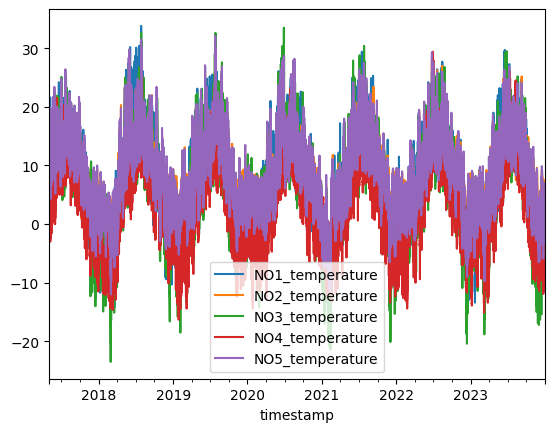

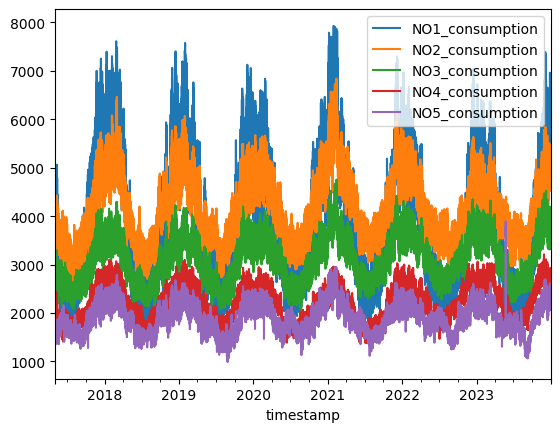

In [73]:
temp.plot()
cons.plot()
plt.show()

### Identifying spikes and replacing with holes


In [95]:
def remove_spikes(data, threshold=3.2):
    tensor = torch.tensor(data.values)
    mean = tensor.mean()
    std = tensor.std()
    z_scores = (tensor - mean) / std
    spike_indices = (z_scores > threshold) | (z_scores < -threshold)
    tensor[spike_indices] = float("nan")
    return pd.DataFrame(tensor, index=data.index, columns=data.columns)


temp_no_spikes = remove_spikes(temp)
cons_no_spikes = remove_spikes(cons)
temp_no_spikes.isna().sum(), cons_no_spikes.isna().sum()

(NO1_temperature     17
 NO2_temperature      6
 NO3_temperature    243
 NO4_temperature      0
 NO5_temperature      7
 dtype: int64,
 NO1_consumption    1129
 NO2_consumption       2
 NO3_consumption       0
 NO4_consumption       0
 NO5_consumption       0
 dtype: int64)

### Replacing holes with interpolation


In [92]:
temp_no_spikes = temp_no_spikes.interpolate()
cons_no_spikes = cons_no_spikes.interpolate()
temp_no_spikes.isna().sum(), cons_no_spikes.isna().sum()

(NO1_temperature    0
 NO2_temperature    0
 NO3_temperature    0
 NO4_temperature    0
 NO5_temperature    0
 dtype: int64,
 NO1_consumption    0
 NO2_consumption    0
 NO3_consumption    0
 NO4_consumption    0
 NO5_consumption    0
 dtype: int64)

### Plotting without spikes


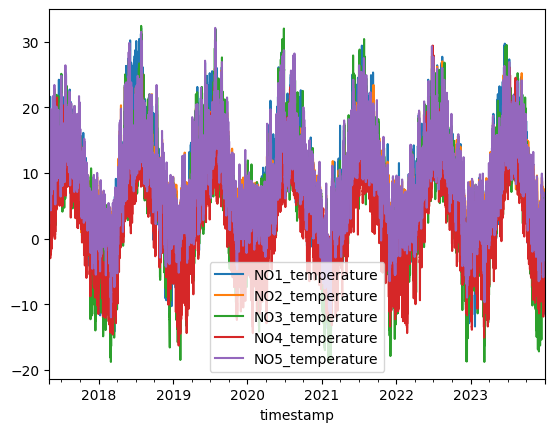

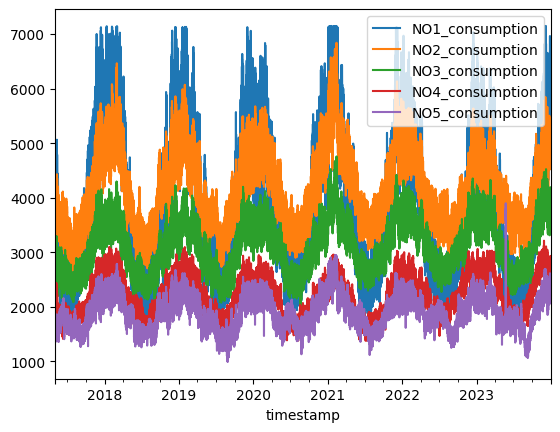

In [93]:
temp_no_spikes.plot()
cons_no_spikes.plot()
plt.show()